In [1]:
import numpy as np
import os
#from mcnsh import mcnormspatialhet
#from nsh import normalizedspatialhet
import matplotlib.pyplot as plt
import matplotlib.colors as mplcolors
import pandas as pd
import matplotlib
from matplotlib.ticker import FormatStrFormatter
matplotlib.rcParams['mathtext.fontset'] = 'stix'
matplotlib.rcParams['font.family'] = 'STIXGeneral'

In [2]:
domain_x_cells = 100
domain_y_cells = 100
#scenario = 'point-source'
#scenario='single-road'
#scenario = 'uniform-basecase'
#scenario = 'fx1fy1'

In [3]:
sh_dataset = pd.read_csv(f'sh_patterns_xres{domain_x_cells}_yres{domain_y_cells}_exact.csv', header=0)

In [7]:
sh_dataset

,scenario,NSH,scaling-factor
0,uniform-basecase,0.0000,1.00
1,fx2fy2,0.0622,2.00
2,fx1fy2,0.1019,2.00
3,fx1fy1,0.1668,2.00
4,fx2fy0,0.2036,2.00
5,fx1fy0,0.3335,2.00
6,road-10x,0.6011,10.00
7,road-8x,0.6147,12.50
8,road-4x,0.6424,25.00
9,road-2x,0.6574,50.00


In [15]:
sh_dataset[sh_dataset.scenario == 'fx2fy2'].NSH.values[0]

0.0622

/tmp/ipykernel_79556/2301585877.py:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Spectral_r").copy()
  cmap.set_bad('white')#'#dedede')


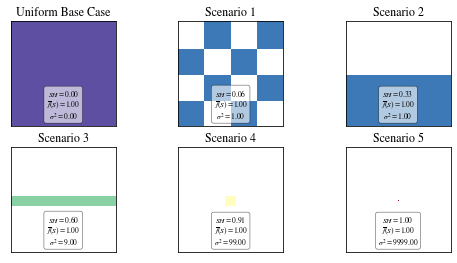

In [4]:
cwd = os.getcwd()
shdir = 'sh-patterns'
griddir = f'xres{domain_x_cells}yres{domain_y_cells}'

fig, axs = plt.subplots(2, 3, figsize=(8.5, 4.25))
cmap = plt.cm.get_cmap('Spectral_r')
cmap.set_bad('white')#'#dedede')

analysis_scenarios = ['uniform-basecase', 'fx2fy2', 'fx1fy0', 
                      'road-10x', 'point-source-10x10', 'point-source-1x1'
                     ]

i = 1

for ax, scenario in zip(axs.flatten(), analysis_scenarios):
    nshval = sh_dataset[sh_dataset.scenario == scenario].NSH.values[0]
    ax.set_xticks([])
    ax.set_yticks([])
    filename = f'{scenario}.csv'
    array_path = os.path.join(cwd, shdir, griddir, filename)
    scenario_arr = np.genfromtxt(array_path, delimiter=',')
    scaling_factor = sh_dataset[sh_dataset.scenario == scenario]["scaling-factor"].values[0]
    scenario_arr = scaling_factor*scenario_arr
    vmin=1
    vmax=10000
    ax.pcolormesh(scenario_arr, norm=mplcolors.LogNorm(vmin, vmax), edgecolor='face',
                  #norm=mplcolors.Normalize(vmin,vmax),
                  cmap=cmap)
    meanval = scenario_arr.mean()
    variance = scenario_arr.std()**2

    if scenario == 'uniform-basecase':
        title_name = 'Uniform Base Case'
    else:
        title_name = f'Scenario {i}'
        i += 1
    ax.set_title(title_name, fontsize=12)
    ax.text(x=.5, y=.07, s=f'$SH={nshval:3.2f}$\n$\overline{{f}}(S)={meanval:3.2f}$\n$\sigma^2={variance:3.2f}$',
            fontsize=7.5, linespacing=1,
            horizontalalignment='center', transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=.6, boxstyle='round', lw=.6))
    ax.set_aspect('equal', adjustable='box')
    
plt.savefig(f'SH-scenarios-all.pdf', format='pdf', bbox_inches='tight')


/tmp/ipykernel_79556/2638387704.py:7: MatplotlibDeprecationWarning: You are modifying the state of a globally registered colormap. This has been deprecated since 3.3 and in 3.6, you will not be able to modify a registered colormap in-place. To remove this warning, you can make a copy of the colormap first. cmap = mpl.cm.get_cmap("Spectral_r").copy()
  cmap.set_bad('white')#'#dedede')


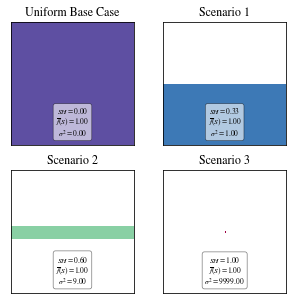

In [5]:
cwd = os.getcwd()
shdir = 'sh-patterns'
griddir = f'xres{domain_x_cells}yres{domain_y_cells}'

fig, axs = plt.subplots(2, 2, figsize=(5, 5))
cmap = plt.cm.get_cmap('Spectral_r')
cmap.set_bad('white')#'#dedede')

analysis_scenarios = ['uniform-basecase', 'fx1fy0', 
                      'road-10x','point-source-1x1'
                     ]

i = 1

for ax, scenario in zip(axs.flatten(), analysis_scenarios):
    nshval = sh_dataset[sh_dataset.scenario == scenario].NSH.values[0]
    ax.set_xticks([])
    ax.set_yticks([])
    filename = f'{scenario}.csv'
    array_path = os.path.join(cwd, shdir, griddir, filename)
    scenario_arr = np.genfromtxt(array_path, delimiter=',')
    scaling_factor = sh_dataset[sh_dataset.scenario == scenario]["scaling-factor"].values[0]
    scenario_arr = scaling_factor*scenario_arr
    vmin=1
    vmax=10000
    ax.pcolormesh(scenario_arr, norm=mplcolors.LogNorm(vmin, vmax), edgecolor='face',
                  #norm=mplcolors.Normalize(vmin,vmax),
                  cmap=cmap)
    meanval = scenario_arr.mean()
    variance = scenario_arr.std()**2

    if scenario == 'uniform-basecase':
        title_name = 'Uniform Base Case'
    else:
        title_name = f'Scenario {i}'
        i += 1
    ax.set_title(title_name, fontsize=12)
    ax.text(x=.5, y=.07, s=f'$SH={nshval:3.2f}$\n$\overline{{f}}(S)={meanval:3.2f}$\n$\sigma^2={variance:3.2f}$',
            fontsize=7.5, linespacing=1,
            horizontalalignment='center', transform=ax.transAxes,
            bbox=dict(facecolor='white', alpha=.6, boxstyle='round', lw=.6))
    ax.set_aspect('equal', adjustable='box')
    
plt.savefig(f'SH-scenarios-main-runs.pdf', format='pdf', bbox_inches='tight')
